##SUPERVISED ML

###Healthcare-Stroke Prediction

####By using health information to predict if a person might have a stroke and helpingin early care and prevention

##Classification Algorithms

##Decision Tree Classifier

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
iris=load_iris()

In [ ]:
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from google.colab import files
up=files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


In [ ]:
data=pd.read_csv(r'healthcare-dataset-stroke-data.csv')

In [ ]:
df=pd.DataFrame(data)


In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,1,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,1,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,1,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,2,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,0,3,0,103.08,18.6,0,0
5106,44873,0,81.0,0,0,1,2,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,2,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,1,0,166.29,25.6,1,0


In [ ]:
df['gender']=df['gender'].replace("Male",1)
df['gender']=df['gender'].replace("Female",0)
df['gender']=df['gender'].replace("Other",2)
df['ever_married']=df['ever_married'].replace("Yes",1)
df['ever_married']=df['ever_married'].replace("No",0)
df['Residence_type']=df['Residence_type'].replace("Urban",1)
df['Residence_type']=df['Residence_type'].replace("Rural",0)
df['work_type']=df['work_type'].replace("Govt_job",0)
df['work_type']=df['work_type'].replace("Private",1)
df['work_type']=df['work_type'].replace("Self-employed",2)
df['work_type']=df['work_type'].replace("children",3)
df['work_type']=df['work_type'].replace("Never_worked",4)
df['smoking_status']=df['smoking_status'].replace("Unknown",0)
df['smoking_status']=df['smoking_status'].replace("formerly smoked",1)
df['smoking_status']=df['smoking_status'].replace("never smoked",2)
df['smoking_status']=df['smoking_status'].replace("smokes",3)

/tmp/ipython-input-2674409850.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['work_type']=df['work_type'].replace("Never_worked",4)


In [ ]:
x=df[['age','bmi','gender','ever_married','work_type','smoking_status','Residence_type','avg_glucose_level']]

In [ ]:
y=df['stroke']

In [ ]:
x

,age,bmi,gender,ever_married,work_type,smoking_status,Residence_type,avg_glucose_level
0,67.0,36.6,1,1,1,1,1,228.69
2,80.0,32.5,1,1,1,2,0,105.92
3,49.0,34.4,0,1,1,3,1,171.23
4,79.0,24.0,0,1,2,2,0,174.12
5,81.0,29.0,1,1,1,1,1,186.21
...,...,...,...,...,...,...,...,...
5104,13.0,18.6,0,0,3,0,0,103.08
5106,81.0,40.0,0,1,2,2,1,125.20
5107,35.0,30.6,0,1,2,2,0,82.99
5108,51.0,25.6,1,1,1,1,0,166.29


In [ ]:
y

,stroke
0,1
2,1
3,1
4,1
5,1
...,...
5104,0
5106,0
5107,0
5108,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
model=DecisionTreeClassifier(random_state=42)

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print("acc",accuracy_score(y_test,y_pred))

acc 0.9069925322471147


In [ ]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)

<Axes: >

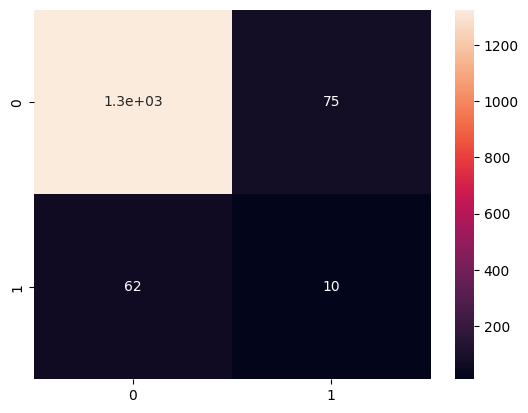

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
cm

array([[1326,   75],
       [  62,   10]])

##Graphs

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
avg=df['stroke'].mean()

In [ ]:
group=df.groupby('work_type')['stroke'].mean()

In [ ]:
avg

np.float64(0.0487279843444227)

In [ ]:
df['stroke'].fillna(avg,inplace=True)

/tmp/ipython-input-2344442027.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stroke'].fillna(avg,inplace=True)


In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df['work_type'].fillna("not mentioned",inplace=True)

/tmp/ipython-input-700734489.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['work_type'].fillna("not mentioned",inplace=True)


In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df['gender']=df['gender'].replace("Male","M")

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke+10
0,9046,M,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,11
1,51676,F,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,11
2,31112,M,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,11
3,60182,F,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,11
4,1665,F,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,F,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,10
5106,44873,F,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,10
5107,19723,F,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,10
5108,37544,M,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,10


In [ ]:
df['gender']=df['gender'].replace("Female","F")

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke+10
0,9046,M,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,11
1,51676,F,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,11
2,31112,M,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,11
3,60182,F,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,11
4,1665,F,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,F,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,10
5106,44873,F,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,10
5107,19723,F,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,10
5108,37544,M,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,10


In [ ]:
df['stroke+10']=df['stroke']+10

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke+10
0,9046,M,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,11
1,51676,F,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,11
2,31112,M,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,11
3,60182,F,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,11
4,1665,F,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,F,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,10
5106,44873,F,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,10
5107,19723,F,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,10
5108,37544,M,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,10


In [ ]:
stroke_mean=df['stroke'].mean()
median=df['stroke'].median

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke+10
0,9046,M,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,11
1,51676,F,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,11
2,31112,M,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,11
3,60182,F,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,11
4,1665,F,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,F,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,10
5106,44873,F,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,10
5107,19723,F,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,10
5108,37544,M,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,10


In [ ]:
group=df.groupby('work_type')['stroke'].mean()

In [ ]:
group

,stroke
work_type,
Govt_job,0.050228
Never_worked,0.000000
Private,0.050940
Self-employed,0.079365
children,0.002911


In [ ]:
pivot=pd.pivot_table(df,
                     values="stroke",
                     index="work_type",
                     columns="gender",
                     aggfunc=['mean','sum']
                     )

In [ ]:
pivot

mean                   sum            
gender                F         M Other     F     M Other
work_type                                                
Govt_job       0.057644  0.038760   NaN  23.0  10.0   NaN
Never_worked   0.000000  0.000000   NaN   0.0   0.0   NaN
Private        0.043330  0.062393   0.0  76.0  73.0   0.0
Self-employed  0.079365  0.079365   NaN  40.0  25.0   NaN
children       0.006135  0.000000   NaN   2.0   0.0   NaN

In [ ]:
import matplotlib.pyplot as plt

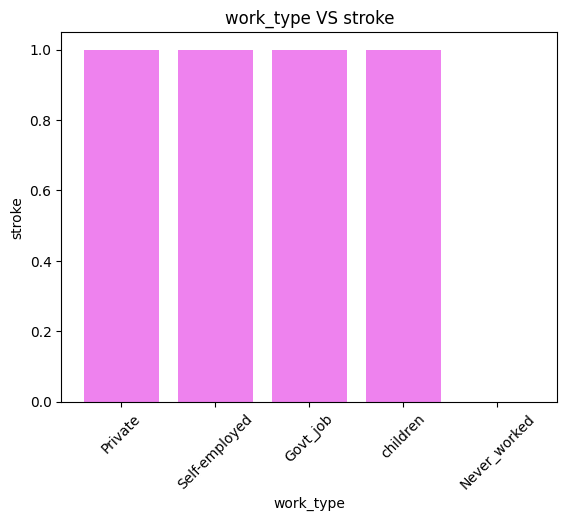

In [ ]:
plt.bar(df['work_type'],df['stroke'],color='violet')
plt.xlabel("work_type")
plt.ylabel('stroke')
plt.xticks(rotation=45)
plt.title("work_type VS stroke")
plt.show()

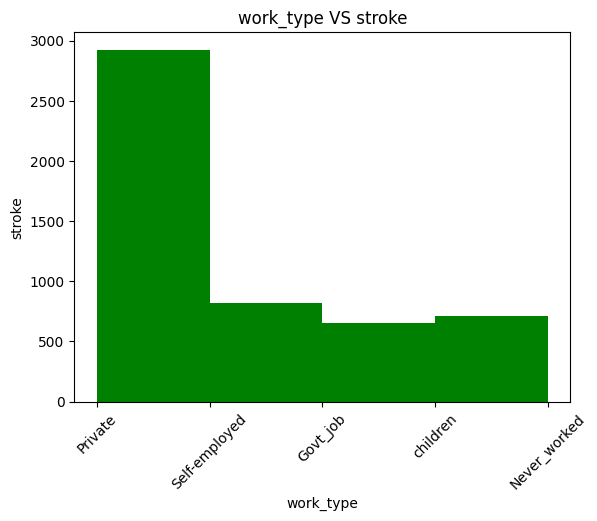

In [ ]:
plt.hist(df['work_type'],color='green',bins=4)
plt.xlabel("work_type")
plt.ylabel('stroke')
plt.xticks(rotation=45)
plt.title("work_type VS stroke")
plt.show()

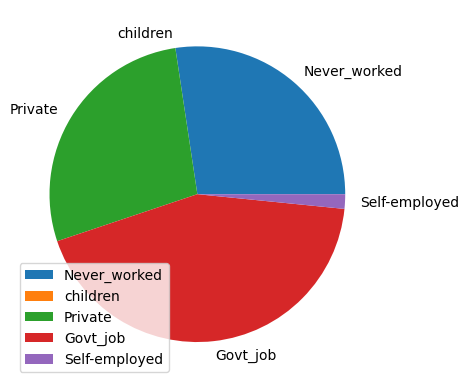

In [ ]:
plt.pie(group , labels=['Never_worked','children','Private', 'Govt_job','Self-employed'])
plt.legend()
plt.show()

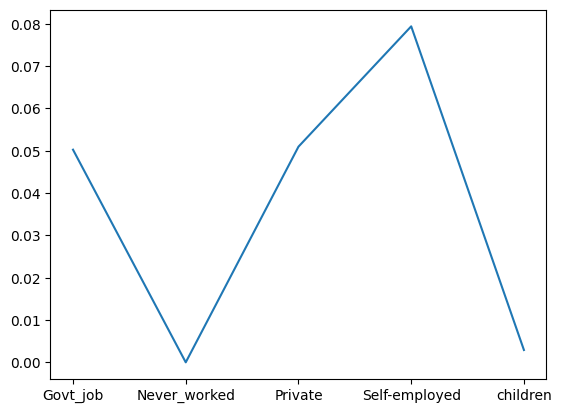

In [ ]:
plt.plot(group)
plt.show()

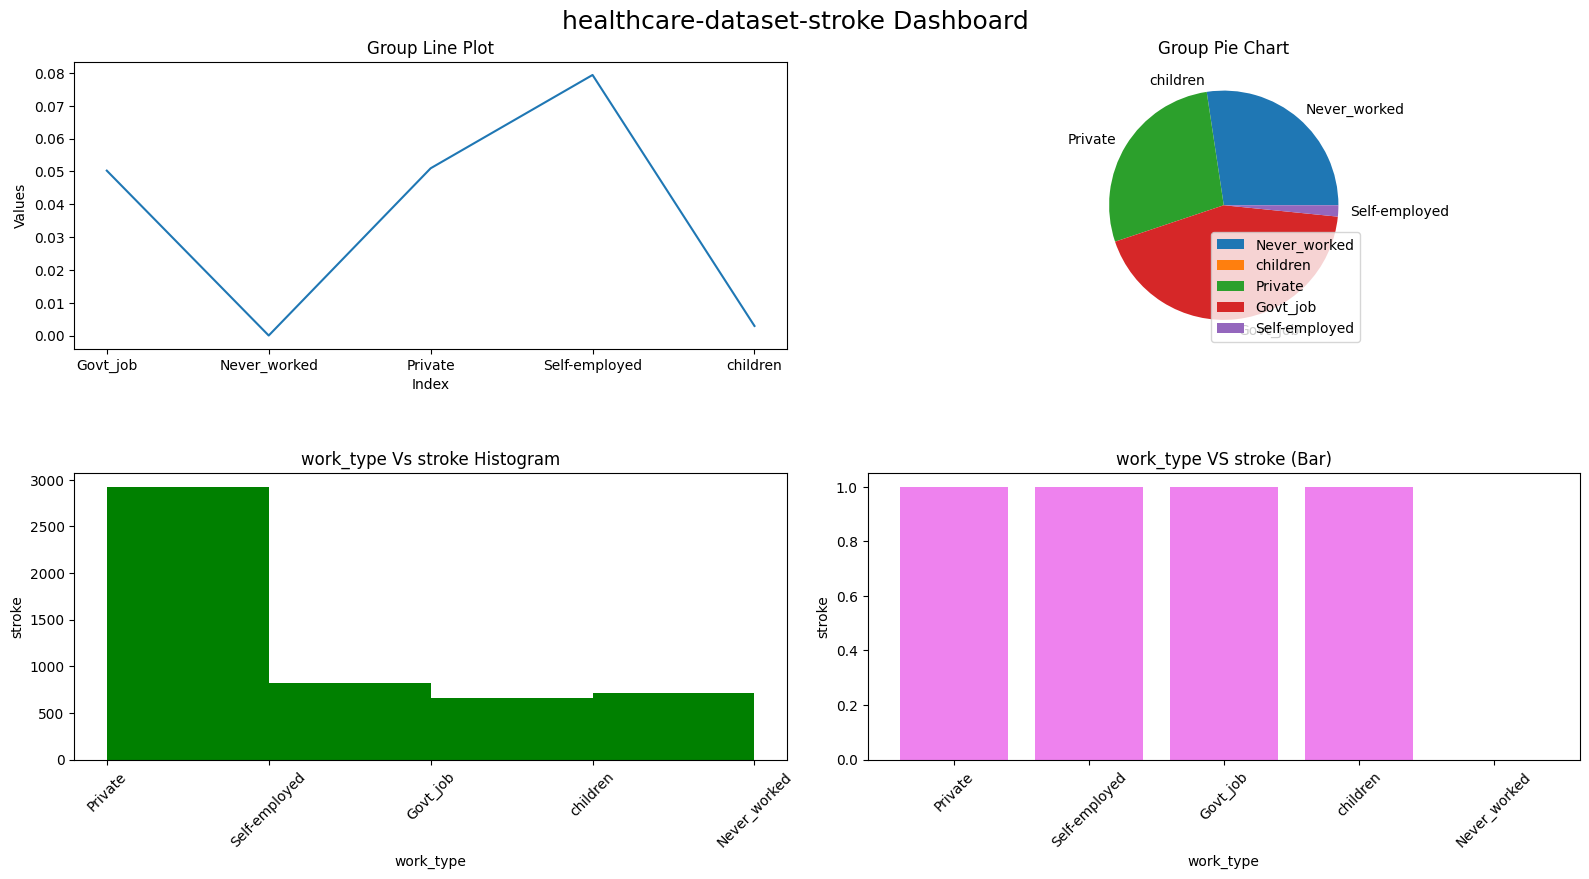

In [ ]:
plt.figure(figsize=(16,12))
plt.suptitle("healthcare-dataset-stroke Dashboard", fontsize=18)
plt.subplot(3,2,1)
plt.plot(group)
plt.title("Group Line Plot")
plt.xlabel("Index")
plt.ylabel("Values")
plt.subplot(3,2,2)
plt.pie(group, labels=['Never_worked','children','Private', 'Govt_job','Self-employed'])
plt.title("Group Pie Chart")
plt.legend(loc='best')
plt.subplot(3,2,3)
plt.hist(df['work_type'], color='green', bins=4)
plt.xlabel("work_type")
plt.ylabel("stroke")
plt.xticks(rotation=45)
plt.title("work_type Vs stroke Histogram")
plt.subplot(3,2,4)
plt.bar(df['work_type'], df['stroke'], color='violet')
plt.xlabel("work_type")
plt.ylabel("stroke")
plt.xticks(rotation=45)
plt.title("work_type VS stroke (Bar)")
plt.tight_layout()
plt.show()


##To Download Model

In [ ]:
import pickle

In [ ]:
with open("model.pkl", "wb")as f:
  pickle.dump(model, f)

In [ ]:
from google.colab import files
files.download("model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle
pickle.dump(model,open("model.pkl","wb"))